In [1]:
import astropy
import numpy as np
import pandas as pd
import matplotlib
import scipy

from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

In [81]:
# gets velocity of cube for FILE1 @ specific index
def get_v(indx):
    return (4.551 * 10 ** 4) - ((8.30 * 10 ** 2) * indx)

In [179]:
# gets index of specific cube velocity for FILE1
def get_indx(v):
    return int(np.abs((v - (4.551 * 10 ** 4)) / (8.3 * 10 ** 2)))

In [176]:
# returns first moment map given an HI cube
def mom_first(file, v_start, v_end, plot = True):
    sum = 0
    i_start = get_indx(v_start)
    i_end = get_indx(v_end)
    for i in range(i_start, i_end):
        sum += (file[0].data[i] * get_v(i))
    sum /= np.sum(file[0].data, axis = 0)
    
    if plot:
        plt.imshow(sum, cmap = 'viridis')
        plt.colorbar()
    else:    
        return sum

In [181]:
# returns second moment map given an HI cube
def mom_sec(file, mom_first, v_start, v_end, plot = True):
    sum = 0
    i_start = get_indx(v_start)
    i_end = get_indx(v_end)
    for i in range(i_start, i_end):
        sum += (file[0].data[i] * ((get_v(i) - mom_first) ** 2))
    sum /= np.sum(file[0].data, axis = 0)
    
    if plot:
        plt.imshow(sum, cmap = 'viridis')
        plt.colorbar()
    else:
        return sum

In [183]:
def plot_mom(mom_first, mom_sec, title, vmin1, vmax1, vmin2, vmax2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7), constrained_layout = True)
    fig.suptitle(title, fontsize = 30)
    mom1 = ax1.imshow(mom_first, vmin = vmin1, vmax = vmax1)
    ax1.set_title('First Moment')
    mom2 = ax2.imshow(mom_sec, vmin = vmin2, vmax = vmax2)
    ax2.set_title('Second Moment')
    fig.colorbar(mom1, ax = ax1, orientation = 'horizontal')
    fig.colorbar(mom2, ax = ax2, orientation = 'horizontal')
    #ax1.contour(IR_exc, colors = 'orange', levels = [0, 2, 3], linestyles = ['dotted', '-', '-'], linewidths = 3) 
    #ax2.contourf(IR_exc, colors = 'orange', levels = [0, 10], alpha = 0.1)

In [103]:
rt = '/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/HI_CUBES/'
file1 = fits.open(rt + '1H0717.fits') 
file1[0].data[np.where(file1[0].data == -32768)] = 0 # thresholding data
file2 = fits.open(rt + 'HS0624_FINAL_GLS.fits')
#np.load('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/IR_EXCESS/1H0717.fits.npy')

In [190]:
mom1_f1 = mom_first(file1, 5.942 * 10 ** 3, -8.07 * 10 ** 3, plot = False)
mom2_f1 = mom_sec(file1, mom1_f1, 5.942 * 10 ** 3, -8.07 * 10 ** 3, plot = False)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_53205/507580978.py:8: RuntimeWarning: invalid value encountered in true_divide
  sum /= np.sum(file[0].data, axis = 0)


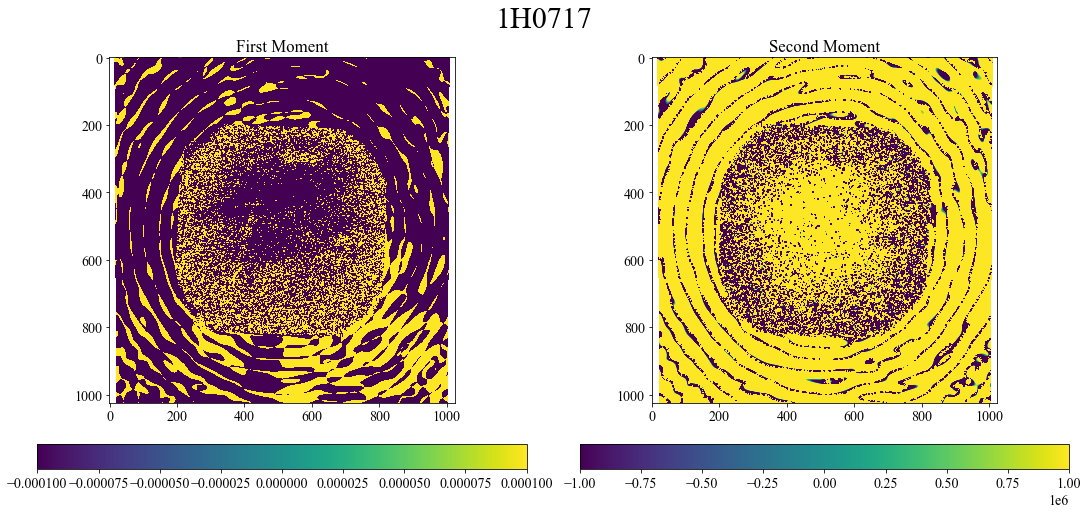

In [197]:
plot_mom(mom1_f1, mom2_f1, '1H0717', vmin1 = -0.0001, vmax1 = 0.0001, vmin2 = -0.1 * 10 ** 7, vmax2 = 0.1 * 10 ** 7)


In [194]:
mom1_f2 = mom_first(file2, 1.336 * 10 ** 4, -8.894 * 10 ** 3, plot = False)
mom2_f2 = mom_sec(file2, mom1_f2, 1.336 * 10 ** 4, -8.894 * 10 ** 3, plot = False)

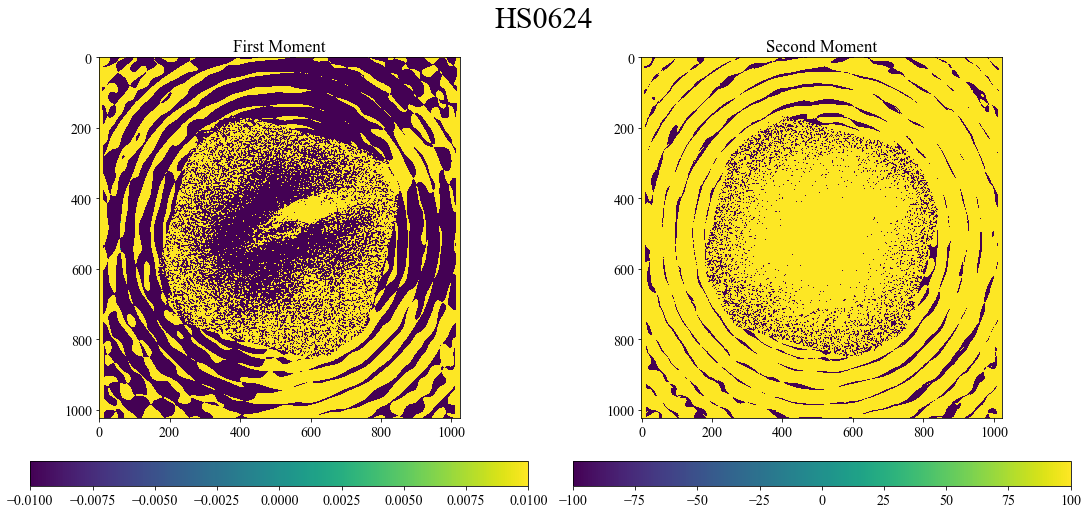

In [196]:
plot_mom(mom1_f2, mom2_f2, 'HS0624', vmin1 = -0.01, vmax1 = 0.01, vmin2 = -100, vmax2 = 100)